This jupyternotbook aim to do an EDA on the species csv file from the article Korchan et al, 2023.

In [1]:
#Library needed

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
import plotly.graph_objects as go
from plotly.offline import download_plotlyjs, init_notebook_mode, plot, iplot

#this line will allow to set an option in pandas for it display all the columns of the dataset 
# what ever the number
pd.set_option('display.max_columns', None)

In the raw data file species the index column is change for index to allow duplicate them when the data are load here. Because of the change the separator changed from , to ; . 

In [2]:
#upload csv file

species = pd.read_csv("C:/Users/marie/Documents/DSTI_Cours/Python_Class/Python_Lab/Exam_project/Project 2/Resources/doi_10_5061_dryad_xpnvx0kmn__v20230901/species.csv", sep=';', index_col='Index')

In [3]:
species.head()

,site,model,Year,Month,Latitude,Longitude,Depth,Region,Coral_cover,Reef_complexity,SST,NPP,Wave_exposure,Habitat_type_classLV0,Habitat_type_classLV2,Coral_area_UFRTM_20km,Coral_area_UFRTM_200km,Depth_Sbrocco,Deepwater,FSA,Marina_slips_10km,Marina_slips_25km,Marine_reserve,Population_20km,Population_50km,Recreational_fishermen_50km,Tourist_fishing,Artificial_reefs_1km,SG_permits_50km,SG_charter_permits_25km,Total_gravity_intercept,Total_gravity,Keys_Divisions,FKNMS,DryTortugas,BNP,CoralECA,Nursery_seagrass,Nursery_mangroves,connectivity,Comm_engagement,Comm_reliance,Rec_engagement,Rec_reliance,Commercial_pounds_landed,Pop_per_area_reef_20km,Random,impact,YEAR,HABITAT_CD,REGION,PCT_CORAL,MAX_HARD_RELIEF,no.divers,Diversity_index
Index,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
0,4733520_128U,biomass,2005,August,24.446433,-81.962900,9.800000,FLA KEYS,2.000000,0.550322,23.595392,550.865051,6.992729,Coral Reef and Hardbottom,Aggregate Reef,88333,1040643,-10.0,1182.842773,3621.320313,0,391,Open,4163,41070,7446,1.649034,0,54,0,69.0,69.0,Marquesas,FKNMS,NaN,NaN,NaN,6483631.0,199409.31250,4.618931,-0.158,-0.129,-0.26,-0.185,1511066.2,0.047128,3786,0.205,2005,ISOL_LR,FLA KEYS,2.000000,0.550322,4,0.877755
1,4966028_487U,impact,2005,June,24.461130,-81.840099,8.821212,FLA KEYS,6.181818,1.886364,23.578271,577.431946,6.950751,Coral Reef and Hardbottom,Spur and Groove,91742,1057990,-6.0,1048.528198,7731.371094,0,733,Open,37045,43641,8378,1.675894,0,70,126,74.0,74.0,Marquesas,FKNMS,NaN,NaN,NaN,11501368.0,21234.26563,9.984375,-0.158,-0.129,-0.26,-0.185,855670.2,0.403795,503,0.382,2005,SPGR_HR,FLA KEYS,6.181818,1.886364,4,0.912085
2,4981032_102U,biomass,2005,July,24.467250,-81.832367,17.399239,FLA KEYS,7.506345,0.749873,23.551355,595.320252,6.950181,Coral Reef and Hardbottom,Pavement,94607,1058988,-7.0,1441.421387,6641.421387,0,733,Open,37170,44078,8548,1.676708,0,70,126,126.0,126.0,Marquesas,FKNMS,NaN,NaN,NaN,12102752.0,13956.82617,9.984375,-0.158,-0.129,-0.26,-0.185,855670.2,0.392888,3430,NaN,2005,CONT_LR,FLA KEYS,7.506345,0.749873,4,0.882112
3,4999782_141U,impact,2005,August,24.468767,-81.822167,9.200000,FLA KEYS,10.000000,0.400000,23.556451,590.443543,6.959807,Coral Reef and Hardbottom,Pavement,96139,1060134,-7.0,1341.421387,5641.421387,0,733,Open,37198,44369,8603,1.696853,0,70,126,126.0,126.0,Marquesas,FKNMS,NaN,NaN,NaN,11003196.0,14876.60742,9.984375,-0.158,-0.129,-0.26,-0.185,855670.2,0.386919,3696,NaN,2005,ISOL_LR,FLA KEYS,10.000000,0.400000,4,0.806049
4,5026033_475U,impact,2005,June,24.470206,-81.808148,8.558032,FLA KEYS,2.870486,0.289415,23.567590,579.874023,6.914992,Coral Reef and Hardbottom,Pavement,98167,1061388,-14.0,900.000000,4324.264160,16,733,Open,37685,45235,8752,1.697870,0,70,126,126.0,126.0,Lower Keys,FKNMS,NaN,NaN,NaN,9313051.0,14697.00195,9.984375,-0.158,-0.129,-0.26,-0.185,855670.2,0.383887,4090,NaN,2005,ISOL_LR,FLA KEYS,2.870486,0.289415,4,0.829156


In [4]:
#identification of the missing values
species.isna().sum()

site                              0
model                             0
Year                              0
Month                             0
Latitude                          0
Longitude                         0
Depth                             0
Region                            0
Coral_cover                     707
Reef_complexity                 707
SST                               0
NPP                               0
Wave_exposure                     0
Habitat_type_classLV0             0
Habitat_type_classLV2             0
Coral_area_UFRTM_20km             0
Coral_area_UFRTM_200km            0
Depth_Sbrocco                     0
Deepwater                         0
FSA                               0
Marina_slips_10km                 0
Marina_slips_25km                 0
Marine_reserve                    0
Population_20km                   0
Population_50km                   0
Recreational_fishermen_50km       0
Tourist_fishing                   0
Artificial_reefs_1km        

Table summarize the cols containing missing values:

| Features | Number of missing value | Description of the features with missing values |
|:---------:|:-------------------------:|:-----------------------------:|
|Coral_cover|             707| percentage of benthos made up of living hard coral visually estimated by RVC surveyors|
|Reef_complexity  |               707| maximum hard relief measured by averaging the height of the highest rigid point above the lowest point in 8 segments of the cylinder for RVC surveys |
|Total_gravity_intercept  |       103| number of people in population centers within 500km divided by the square of travel time *note from authors : same as Total\_gravity and this column was not used* |
|Total_gravity          |         103| number of people in population centers within 500km divided by the square of travel time |
|Keys_Divisions         |        1429| sub-jurisdictions of Florida Keys including Upper, Middle, Lower Keys and Marquesas; NAs for non Florida Keys sites |
|FKNMS                 |         2341| Florida Keys National Marine Sanctuary sites; *NAs for non Florida Keys sites* |
|DryTortugas           |         3372|Dry Tortugas sites; *NAs for non-Dry Tortugas sites* |
|BNP                   |         3740| Biscayne National Park sites; *NAs for non-BNP sites*|
|CoralECA               |        2635| Coral Ecological Conservation Area sites; *NAs for non-ECA sites (also known as SEFCRI)*|
|connectivity            |        623| number of larva from upstream modeled to a connectivity matrix; *model does not extend to further north reefs and those sites were assigned NAs*|
|Comm_engagement      |            89| metrics of commercial engagement based on landings and permits provided by NOAA|
|Comm_reliance         |           89|metrics of commercial engagement based on landings and permits relative to size of fishing community provided by NOAA|
|Rec_engagement         |          89|metrics of recreational engagement based on landings and permits provided by NOAA|
|Rec_reliance            |         89|metrics of recreational engagement based on landings and permits relative to size of fishing community provided by NOAA|
|Commercial_pounds_landed |         1| annual number of pounds of fish reported by commercial anglers|
|impact                 |        1220|fishing impact variable derived in previous project; *note from the authors: not used in final model*|
|PCT_CORAL               |        707| percent coral cover|
|MAX_HARD_RELIEF          |       707|maximum hard relief meaning the Reef complexity |


To summarize:

- For the site's feature (such as BNP, DryTortugas) we have a lot of NaN value but they are explain by the author to be NAs because not thy are sites not in the register. Maybe this NA value will need to be change for something like 'non-site' as is describe in the table above because their aren't "real" missing values. It's the same things for feature where the author note NA. 
- the feature Total_gravity  and Total_gravity_intercept are redondant and the authors only kept Total_gravity for their model. Maybe we can drop the Total_gravity_intercept feature too.
- the features PCT_CORAL and MAX_HARD_RELIEF as coral cover and reef complexity have no explaination for their missing values. In the literature its 2 parameters know to influence the fish type in an environment because they can gives for example hiden space for prey to predator. In addition this 4 features are in relation between them maybe it can be useful to only keep one in each paired feature. 
- the impact feature doesn't take in account by the author in their model and shows a high number of missing values. Maybe we can drop it too. 
- the connectivity feature is describe to be related to nursery feature by the authors in the readme. In these feature we don't see any missing value but in connectivity we see 623 missing value. The relation between these 3 features will be studied. 

In [5]:
#how look the site related features
species.loc[:, ['Keys_Divisions', 'BNP', 'DryTortugas']]

,Keys_Divisions,BNP,DryTortugas
Index,,,
0,Marquesas,NaN,NaN
1,Marquesas,NaN,NaN
2,Marquesas,NaN,NaN
3,Marquesas,NaN,NaN
4,Lower Keys,NaN,NaN
...,...,...,...
3994,NaN,NaN,NaN
3995,Lower Keys,NaN,NaN
3996,Upper Keys,Biscayne National Park,NaN


In [6]:
species.info()

<class 'pandas.core.frame.DataFrame'>
Index: 3999 entries, 0 to 3998
Data columns (total 55 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   site                         3999 non-null   object 
 1   model                        3999 non-null   object 
 2   Year                         3999 non-null   int64  
 3   Month                        3999 non-null   object 
 4   Latitude                     3999 non-null   float64
 5   Longitude                    3999 non-null   float64
 6   Depth                        3999 non-null   float64
 7   Region                       3999 non-null   object 
 8   Coral_cover                  3292 non-null   float64
 9   Reef_complexity              3292 non-null   float64
 10  SST                          3999 non-null   float64
 11  NPP                          3999 non-null   float64
 12  Wave_exposure                3999 non-null   float64
 13  Habitat_type_classLV0  

In [7]:
species.describe()

,Year,Latitude,Longitude,Depth,Coral_cover,Reef_complexity,SST,NPP,Wave_exposure,Coral_area_UFRTM_20km,Coral_area_UFRTM_200km,Depth_Sbrocco,Deepwater,FSA,Marina_slips_10km,Marina_slips_25km,Population_20km,Population_50km,Recreational_fishermen_50km,Tourist_fishing,Artificial_reefs_1km,SG_permits_50km,SG_charter_permits_25km,Total_gravity_intercept,Total_gravity,Nursery_seagrass,Nursery_mangroves,connectivity,Comm_engagement,Comm_reliance,Rec_engagement,Rec_reliance,Commercial_pounds_landed,Pop_per_area_reef_20km,Random,impact,YEAR,PCT_CORAL,MAX_HARD_RELIEF,no.divers,Diversity_index
count,3999.000000,3999.000000,3999.000000,3999.000000,3292.000000,3292.000000,3999.000000,3999.000000,3999.000000,3999.000000,3.999000e+03,3999.000000,3999.000000,3999.000000,3999.000000,3999.000000,3.999000e+03,3.999000e+03,3999.000000,3999.000000,3999.000000,3999.000000,3999.000000,3896.000000,3896.000000,3.999000e+03,3.999000e+03,3376.000000,3910.000000,3910.000000,3910.000000,3910.000000,3.998000e+03,3999.000000,3999.000000,2779.000000,3999.000000,3292.000000,3292.000000,3999.000000,3999.000000
mean,2012.886222,25.361813,-80.912910,12.031226,4.549820,1.100154,23.760696,523.320811,7.322459,76727.255314,9.204478e+05,-13.858828,2217.992204,13881.413088,407.944986,1479.008002,3.210438e+05,1.330372e+06,46936.535134,14.790847,0.634409,39.187547,43.831708,2451.431725,2451.431725,1.784502e+07,3.693521e+05,23.648416,0.104939,-0.069880,0.076328,0.424433,6.312866e+05,6.386781,5047.471618,0.400637,2012.886222,4.549820,1.100154,3.115779,0.831469
std,3.629448,0.806724,1.051129,6.942690,5.522744,0.851008,0.552442,163.404174,0.211270,44693.794158,2.372087e+05,8.434335,2627.599357,11587.136846,587.148277,1407.965869,4.656593e+05,1.662962e+06,49462.069652,21.121447,2.466154,23.110590,44.874584,6625.344914,6625.344914,1.976313e+07,7.133488e+05,24.807148,0.754119,0.139033,0.904179,2.247541,4.861803e+05,11.092795,2919.598275,0.281552,3.629448,5.522744,0.851008,0.998422,0.114777
min,2005.000000,24.431943,-82.986818,1.300482,0.000000,0.075887,22.405206,287.664307,5.213092,12257.000000,3.420410e+05,-56.000000,0.000000,0.000000,0.000000,0.000000,0.000000e+00,0.000000e+00,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000e+00,0.000000e+00,0.667306,-0.158000,-0.129000,-0.260000,-0.185000,1.706314e+05,0.000000,1.000000,0.000000,2005.000000,0.000000,0.075887,2.000000,0.000000
25%,2011.000000,24.632586,-81.695419,6.351316,1.500000,0.500000,23.608484,365.925385,7.294437,50594.000000,8.440460e+05,-20.000000,700.000000,4610.660157,0.000000,524.000000,3.068000e+03,2.328300e+04,5997.000000,0.000000,0.000000,31.000000,13.000000,86.000000,86.000000,0.000000e+00,1.966915e+04,5.417427,-0.158000,-0.129000,-0.260000,-0.185000,2.469954e+05,0.039136,2550.500000,0.174000,2011.000000,1.500000,0.500000,2.000000,0.811582
50%,2013.000000,25.123213,-80.292226,10.171806,2.758143,0.900596,23.929285,533.677063,7.368210,60682.000000,9.595900e+05,-12.000000,1200.000000,9904.163086,56.000000,809.000000,1.482100e+04,1.920190e+05,17132.000000,1.896063,0.000000,39.000000,34.000000,218.000000,218.000000,1.060144e+07,1.515129e+05,16.642971,-0.158000,-0.129000,-0.260000,-0.185000,3.180504e+05,0.248873,5097.000000,0.382000,2013.000000,2.758143,0.900596,4.000000,0.867035
75%,2016.000000,26.034196,-80.092946,17.148568,5.283544,1.448243,24.200861,632.628479,7.455595,91516.000000,1.103821e+06,-7.000000,2455.634888,20883.452150,644.500000,2036.000000,6.927670e+05,2.859482e+06,93870.000000,32.305483,0.000000,50.000000,56.000000,1507.000000,1507.000000,3.280893e+07,3.810131e+05,32.740639,-0.105000,-0.118000,-0.176000,0.044000,8.556702e+05,12.681632,7602.000000,0.694000,2016.000000,5.283544,1.448243,4.000000,0.900148
max,2018.000000,27.189445,-79.993800,32.295441,55.000000,10.538338,24.436212,1330.589233,7.597482,280125.000000,1.203928e+06,-2.000000,12631.371090,50031.074220,2490.000000,5459.000000,1.482050e+06,4.480603e+06,140719.000000,60.773111,26.000000,91.000000,188.000000,39335.000000,3

The random variable is use to determine the significance in trait model. We can keep this feature to class the other feature and see with PCA algo how the other feature behave in function of it. 

The no.divers come from RVC (Reef Visual Census) an american association (https://www.nodc.noaa.gov/archive/arc0101/0157633/8.8/data/0-data/Atlantic/Biological/Florida/NCRMP_RVC_Protocol_2017.pdf) who give some rules for evaluating the fish diversity. This feature is linked with the specAbund table.

In [8]:
species['no.divers'].unique()

array([4, 2, 8, 6], dtype=int64)

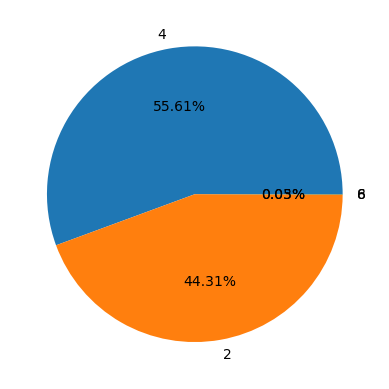

In [9]:
plt.pie(species['no.divers'].value_counts(),labels=species['no.divers'].value_counts().index,autopct='%1.2f%%')
plt.show()

For the no.divers feature we can see that the majority of the data are concentrate in the 2 and 4 categories. 
In the readme this feature is describe by the authors to be number of divers for RVC survey and is complete with the table SpecAbund. 

*Look at this table to feel this feature*

Here exploration about the relation between the features coral_cover and PCT_coral as well as Reef_complexity and max hard reef

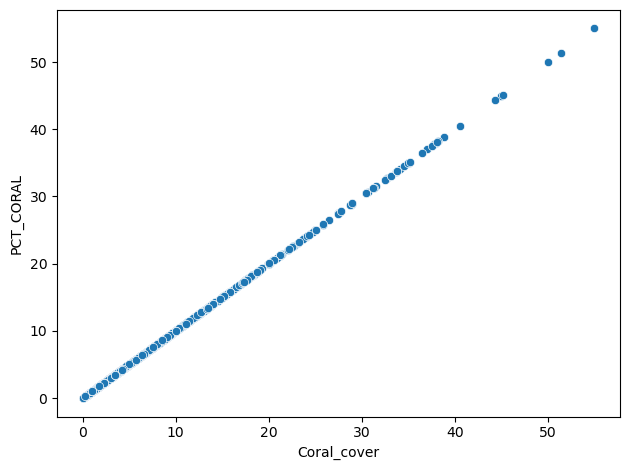

In [10]:
#Plot coral cover and PCT_coral to see if it's exist a linear relation between them

sns.scatterplot(data=species, x = "Coral_cover", y = "PCT_CORAL")
plt.tight_layout()
plt.show()

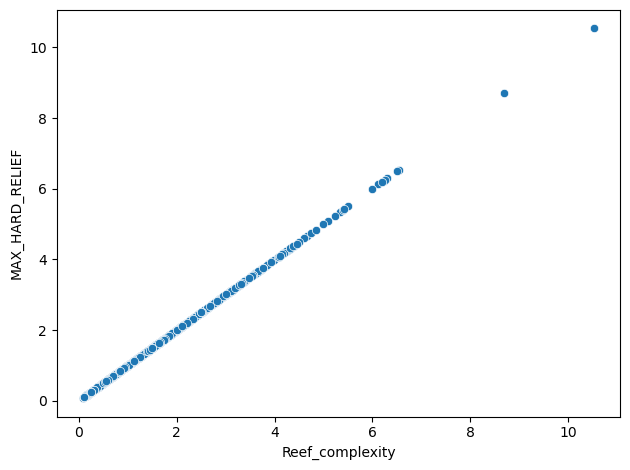

In [11]:
#Plot reef complexity and MAX_HARD_RELIEF to see if it's exist a linear relation between them

sns.scatterplot(data=species, x = "Reef_complexity", y = "MAX_HARD_RELIEF")
plt.tight_layout()
plt.show()

This 2 plot show the strict linear relation between the feature coral cover and PCT coral, reef_complexity and MAX_HARD_RELIEF. We can choose to ignore one of them in each pair because their are redundance. 
Moreover they scatter plot highline the outlier in the both pair:
- greater than 8 for Reef_complexity
- greater than 40 for Coral_cover

*Keep that it mind and see later what we will do with them.*

Study the relation between region and others coral, reef, nursery type and connectivity features as well as the diversity index. 
The aim here is to see how the region can impact the target and what is linked with the region.

*add a study of the features linked with human activities and the region*

In [12]:
species.Region.unique()

array(['FLA KEYS', 'DRY TORT', 'SEFCRI'], dtype=object)

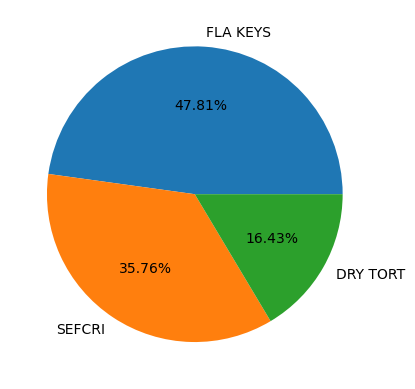

In [13]:
plt.pie(species.Region.value_counts(),labels=species.Region.value_counts().index,autopct='%1.2f%%')
plt.show()

The different regions shows imbalanced data between them. 
How behave the target in function of them ? 

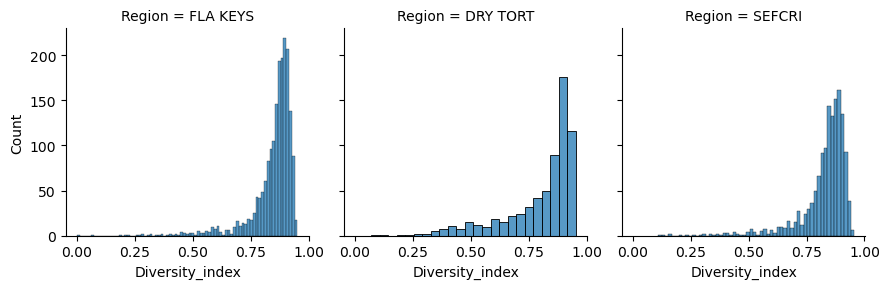

In [14]:
g = sns.FacetGrid(data=species,col="Region")
g.map(sns.histplot,"Diversity_index")
plt.tight_layout()
plt.show()

It seems that, the diversity index is high in the FLA KEYS region compared to the other. Look at the descriptive statistics:

In [15]:
species.groupby('Region').describe()

Year                                                         \
           count         mean       std     min     25%     50%     75%   
Region                                                                    
DRY TORT   657.0  2012.614916  3.949293  2006.0  2008.0  2014.0  2016.0   
FLA KEYS  1912.0  2011.559623  3.919600  2005.0  2008.0  2011.0  2014.0   
SEFCRI    1430.0  2014.784615  1.776068  2013.0  2013.0  2014.0  2016.0   

                 Latitude                                             \
             max    count       mean       std        min        25%   
Region                                                                 
DRY TORT  2018.0    657.0  24.650277  0.049885  24.556174  24.607030   
FLA KEYS  2018.0   1912.0  24.885758  0.370328  24.431943  24.521721   
SEFCRI    2018.0   1430.0  26.325238  0.414020  25.521929  25.987080   

                                          Longitude                       \
                50%        75%        max     count       mean       std   
Region                                                                     
DRY TORT  24.653880  24.697108  24.724880     657.0 -82.881795  0.056161   
FLA KEYS  24.873944  25.165284  25.747985    1912.0 -80.867189  0.665016   
SEFCRI    26.210477  26.714850  27.189445    1430.0 -80.069455  0.036336   

                                                                  Depth  \
                min        25%        50%        75%        max   count   
Region                                                                    
DRY TORT -82.986818 -82.929755 -82.887550 -82.835390 -82.770270   657.0   
FLA KEYS -82.010879 -81.586879 -80.583384 -80.253405 -80.087362  1912.0   
SEFCRI   -80.158891 -80.098594 -80.082334 -80.032113 -79.993800  1430.0   

                                                                         \
               mean       std       min       25%        50%        75%   
Region                                                                    
DRY TORT  12.555838  4.795944  2.643458  9.123016  12.403218  15.500000   
FLA KEYS   9.348063  5.704948  1.300482  5.149989   7.647413  11.838487   
SEFCRI    15.377756  7.733376  1.700000  7.800000  15.900000  22.400000   

                    Coral_cover                                          \
                max       count      mean       std  min       25%  50%   
Region                                                                    
DRY TORT  26.768304       657.0  6.591833  6.527406  0.0  2.496516  4.5   
FLA KEYS  30.444428      1912.0  4.803541  5.653140  0.0  1.734004  3.0   
SEFCRI    32.295441       723.0  2.023241  2.317538  0.0  1.000000  1.5   

                              Reef_complexity                                \
               75%        max           count      mean       std       min   
Region                                                                        
DRY TORT  8.250541  45.144766           657.0  1.473544  1.215130  0.175000   
FLA KEYS  5.729213  55.000000          1912.0  1.067548  0.701043  0.100000   
SEFCRI    2.500000  30.470367           723.0  0.847077  0.681836  0.075887   

                                                      SST             \
               25%       50%       75%        max   count       mean   
Region                                                                 
DRY TORT  0.704492  1.122707  1.773516  10.538338   657.0  22.694389   
FLA KEYS  0.501552  0.923627  1.448243   4.276307  1912.0  23.876906   
SEFCRI    0.374924  0.650000  1.150593   6.203144  1430.0  24.095222   

                                                                           \
               std        min        25%        50%        75%        max   
Region                                                                      
DRY TORT  0.219478  22.405206  22.498010  22.647943  22.880884  23.158563   
FLA KEYS  0.259182  23.091394  23.679536  23.808221  24.111978  24.436212   
SEFCRI    0.298492  22.79

It seems that, the diversity index is more heterogeneous in the DRY TORT region compared to the other. In the 2 other region the index is more concentrate around 0.8 and 0.9 with the 25% of the values are around 0.8 and at 75% we get a values on 0.9. 

The interesting thinks is that, the wave exposure in the different region seems to be similar between the 3 regions. 
The 2 others coral feature related to the depth of the coral aera shows a high diversity in repartition between the region. 


This suggest that, the DRY TORT is an heterogeneous region in term of fish diversity and the region FLA KEY and SEFCRI will shows highest diversity scores. 

*Do more research on the Depth_Sbrocco feature -> negative number because measure the water depth ? in relation with Deepwater? Change is value by their absolute value to scale with the others features?
Same more research about Marina_slips 10 and 20 km*

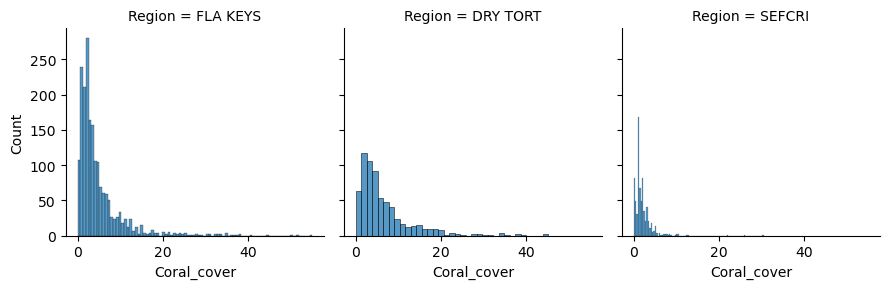

In [16]:
#plot the coral covering in function of Region

g = sns.FacetGrid(data=species,col="Region")
g.map(sns.histplot,"Coral_cover")
plt.tight_layout()
plt.show()

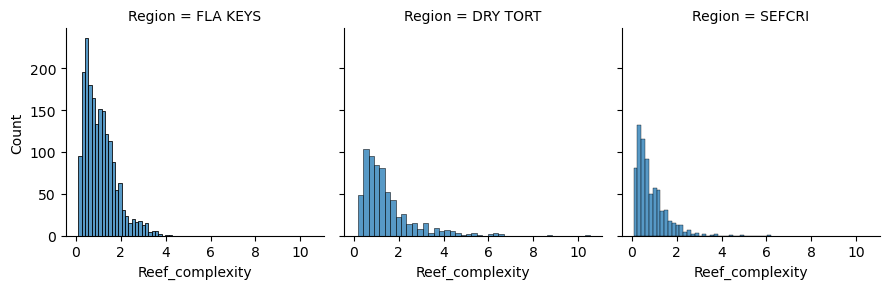

In [17]:
#plot the Reef complexity in function of Region

g = sns.FacetGrid(data=species,col="Region")
g.map(sns.histplot,"Reef_complexity")
plt.tight_layout()
plt.show()

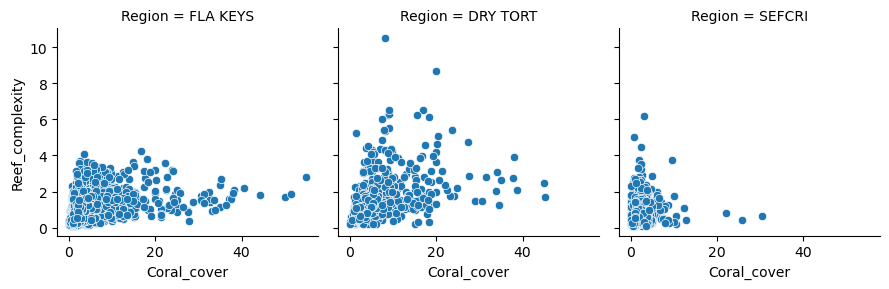

In [18]:
#Plotting the coral_cover against the reef complexity in function of the region

g = sns.FacetGrid(data=species,col="Region")
g.map(sns.scatterplot,"Coral_cover" ,"Reef_complexity")
plt.tight_layout()
plt.show()

This plot suggesting that the different region shows a specific pattern of coral cover and reef complexity. This 2 features seems to be linked together. 
The scatterplot above display outlier in the FLA KEYS region for coral cover (higher to 40) and outlier for coral cover in SEFCRI region (highest to 20). For the reef_complexity only the DRY TORT region display outlier (highest to 8) otherwise the reef complexity pattern in the 3 regions seems to be homogeneous. 

Maybe we can think to fill the missing feature by the mean of the coral_cover for each region or the reef_complexity for each region. 

In [19]:
species.loc[species.Coral_cover >= 40, :]

,site,model,Year,Month,Latitude,Longitude,Depth,Region,Coral_cover,Reef_complexity,SST,NPP,Wave_exposure,Habitat_type_classLV0,Habitat_type_classLV2,Coral_area_UFRTM_20km,Coral_area_UFRTM_200km,Depth_Sbrocco,Deepwater,FSA,Marina_slips_10km,Marina_slips_25km,Marine_reserve,Population_20km,Population_50km,Recreational_fishermen_50km,Tourist_fishing,Artificial_reefs_1km,SG_permits_50km,SG_charter_permits_25km,Total_gravity_intercept,Total_gravity,Keys_Divisions,FKNMS,DryTortugas,BNP,CoralECA,Nursery_seagrass,Nursery_mangroves,connectivity,Comm_engagement,Comm_reliance,Rec_engagement,Rec_reliance,Commercial_pounds_landed,Pop_per_area_reef_20km,Random,impact,YEAR,HABITAT_CD,REGION,PCT_CORAL,MAX_HARD_RELIEF,no.divers,Diversity_index
Index,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
133,3079928_042U,biomass,2006,June,24.722400,-82.835000,17.400000,DRY TORT,45.000000,2.500000,22.440149,731.498413,7.469070,Coral Reef and Hardbottom,Aggregate Reef,49403,911358,-22.0,1041.421387,39066.60938,0,0,Open,0,0,0,0.000000,0,0,0,31.0,31.0,Dry Tortugas,NaN,DRTO,NaN,NaN,12106596.0,0.000,3.958614,-0.158,-0.129,-0.260,-0.185,1511066.2,0.000000,4672,0.000,2006,CONT_HR,DRY TORT,45.000000,2.500000,2,0.805292
360,2907398_053U,biomass,2008,May,24.667426,-82.926126,16.336971,DRY TORT,45.144766,1.708686,22.625909,684.214539,7.397024,Coral Reef and Hardbottom,Aggregate Reef,51169,879346,-16.0,2355.635010,28745.79297,0,0,Open,0,0,0,0.000000,0,0,0,29.0,29.0,Dry Tortugas,NaN,DRTO,NaN,NaN,7705828.0,0.000,1.546670,-0.158,-0.129,-0.260,-0.185,1511066.2,0.000000,2784,0.000,2008,CONT_HR,DRY TORT,45.144766,1.708686,4,0.487945
627,5464847_005U,biomass,2009,August,24.586325,-81.577917,5.750608,FLA KEYS,50.008287,1.674917,23.265375,1258.964722,6.710463,Coral Reef and Hardbottom,Pavement,162686,1108347,-4.0,9800.000000,10138.47754,10,757,Open,19406,49371,9763,1.808565,0,76,177,115.0,115.0,Lower Keys,FKNMS,NaN,NaN,NaN,45676856.0,7754413.500,0.839286,0.911,0.244,0.515,0.277,855670.2,0.119285,5538,NaN,2009,ISOL_MR,FLA KEYS,50.008287,1.674917,4,0.776126
689,7291269_258U,impact,2009,July,24.897234,-80.615559,3.400000,FLA KEYS,55.000000,2.798461,23.686639,933.309815,7.406962,Coral Reef and Hardbottom,Individual or Aggregated Patch Reef,54380,1161227,-4.0,5232.590332,12635.53418,553,1616,Open,9681,23415,6394,1.353982,0,46,71,185.0,185.0,Middle Keys,FKNMS,NaN,NaN,NaN,67910880.0,1490817.625,14.894444,2.960,0.347,3.101,0.995,613278.2,0.178025,3412,0.402,2009,ISOL_MR,FLA KEYS,55.000000,2.798461,4,0.886711
841,5299833_009U,impact,2011,July,24.560451,-81.663956,3.848156,FLA KEYS,51.418994,1.861061,23.371728,1202.854858,6.548940,Coral Reef and Hardbottom,Pavement,165426,1086162,-5.0,8700.000000,12692.38770,342,745,Open,41170,48057,9484,1.720457,0,76,177,NaN,NaN,Lower Keys,FKNMS,NaN,NaN,NaN,27641972.0,6194649.000,1.951333,0.911,0.244,0.515,0.277,855670.2,0.248873,4757,NaN,2011,ISOL_MR,FLA KEYS,51.418994,1.861061,4,0.783779
2933,5326086_003U,biomass,2011,July,24.567517,-81.650622,2.909081,FLA KEYS,44.318937,1.807973,23.265771,1264.910400,6.610450,Coral Reef and Hardbottom,Pavement,166970,1090261,-5.0,9000.000000,11623.75879,168,745,Open,41778,48057,9484,1.720457,0,76,177,NaN,NaN,Lower Keys,FKNMS,NaN,NaN,NaN,30255150.0,7623135.000,1.951333,0.911,0.244,0.515,0.277,855670.2,0.250213,3679,NaN,2011,ISOL_MR,FLA KEYS,44.318937,1.807973,2,0.919928
2935,5281081_002U,impact,2011,July,24.556412,-81.674014,3.541805,FLA KEYS,40.546318,2.211876,23.403406,1175.207520,6.676023,Coral Reef and Hardbottom,Pavement,164719,1083383,-5.0,8648.528320,12012.48926,342,745,Open,41083,48057,9484,1.720457,0,76,177,NaN,NaN,Lower Keys,FKNMS,NaN,NaN,NaN,27039020.0,5559184.000,1.951333,0.911,0.244,0.515,0.277,855670.2,0.249413,4442,NaN,2011,ISOL_MR,FLA KEYS,40.546318,2.211876,2,0.918789


The region feature compared to the sites feature don't show missing value. 
*Maybe we can kept the region and drop the name site feature.*

Study of the relation between connectivity and the nursery feature seagrass and mangrove. 
Maybe this feature should be link with the region. 

In [20]:
species.loc[:, ['Nursery_seagrass','Nursery_mangroves', 'connectivity']].corr()


,Nursery_seagrass,Nursery_mangroves,connectivity
Nursery_seagrass,1.000000,0.320622,-0.226033
Nursery_mangroves,0.320622,1.000000,-0.032880
connectivity,-0.226033,-0.032880,1.000000


In [21]:

px.imshow(species.loc[:, ['Nursery_seagrass','Nursery_mangroves', 'connectivity']].corr())

the correlation matrix show that:
- the connectivity is "negatively" correlated with seagrass and mangroves meaning more he has seagrass or mangrove lower it's the connectivity
- the nursery seagrass is positively correlated with nursery mangrove

The connectivity is describe as the number of larvae release in each location. The current can be take in account for the larval dispersion. More here:https://coralreefwatch.noaa.gov/product/larval_connectivity/

This suggest that, a nursery contain the both element. The connectivity is describe as an important factor for the fish resilience for an environment. Maybe we have to keep it because it can be influence the target. Hypothesis: if the connectivity is high that can be link to a favorable environment for the fish nursery as well as for fish life. 



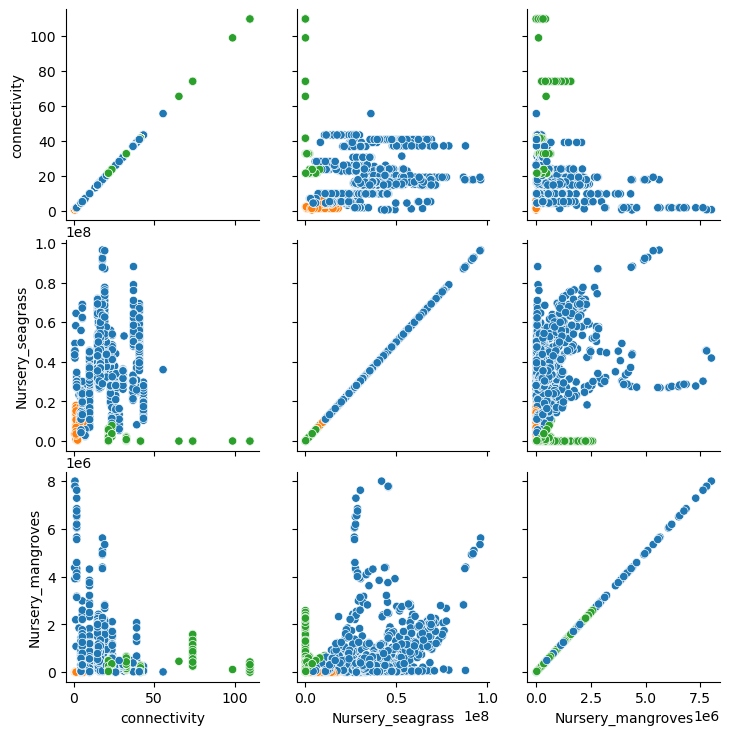

In [22]:
#plot the Connectivity in function of Region

#the PairGrid() function as Facetgrid() create multiple plot in function of variable
#the advantage of PairGrid() is the scale is adapt to the data for each cross plot and the output is a matrix showing the relation between the features

g = sns.PairGrid(species, vars=["connectivity", "Nursery_seagrass", "Nursery_mangroves"], hue="Region")
g.map(sns.scatterplot)



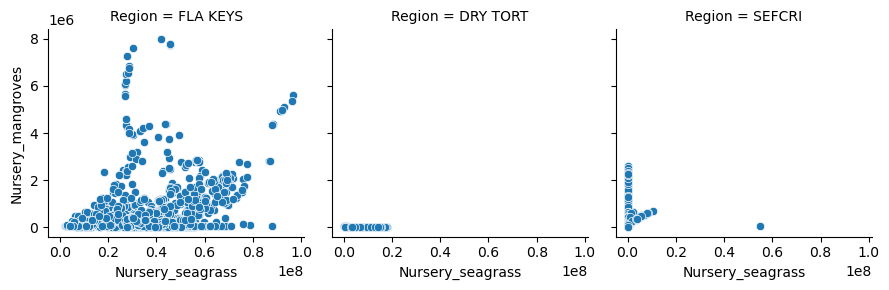

In [23]:
#Plot the nursery seagrass and mangrove in function of the region
g = sns.FacetGrid(data=species,col="Region")
g.map(sns.scatterplot,"Nursery_seagrass" ,"Nursery_mangroves")
plt.tight_layout()
plt.show()

These plot shows that the nursery are high in the region FLA KEYS but low in the DRY TORT and SEFCRI

We can thing that, their exist a link between nursery seagrass/mangrove and coral_cover or/and reef complexity ? 


In [24]:
#Correlation matrix between nursery features and coral cover, reef complexity

px.imshow(species.loc[:, ['Nursery_seagrass','Nursery_mangroves', 'connectivity', 'Coral_cover', 'Reef_complexity']].corr())

Reef complexity is negatively related to nursery feature as well as connectivity but its positively correlated with coral cover as it was suggested earlier in this EDA. 
Coral cover is positively correlated with nursery features but negatively with connectivity.

Moreover the coral cover in the region FLA KEYS is highest compared to the others region as we can observed fot the nursery where they are both more abundant in the FLA KEY region compared to the others. 

*We can hypothesized that, the coral cover favor the nursery environment and maybe can influence the fish diversity by enhancing the fish reproduction?*

For the PCA analysis after the feature engeenering when we don't have any NaN value in the dataset

In [25]:
#extraction of the numerical column in the species dataset to construct the X dataset which it not contain the target diversity_index

#species_numcol = species.loc[:,['Year','Latitude','Longitude','Depth','Coral_cover','Reef_complexity','Wave_exposure','Coral_area_UFRTM_20km', 'Coral_area_UFRTM_200km', 'Depth_Sbrocco','Deepwater','Marina_slips_10km', 'Marina_slips_25km','Population_20km','Population_50km','Recreational_fishermen_50km', 'Tourist_fishing', 'Artificial_reefs_1km', 'SG_permits_50km', 'SG_charter_permits_25km', 'Total_gravity_intercept','Total_gravity', 'Nursery_seagrass', 'Nursery_mangroves', 'connectivity', 'Comm_engagement', 'Comm_reliance', 'Rec_engagement', 'Rec_reliance','Commercial_pounds_landed', 'Pop_per_area_reef_20km', 'Random', 'impact', 'YEAR', 'PCT_CORAL', 'MAX_HARD_RELIEF','no.divers']]






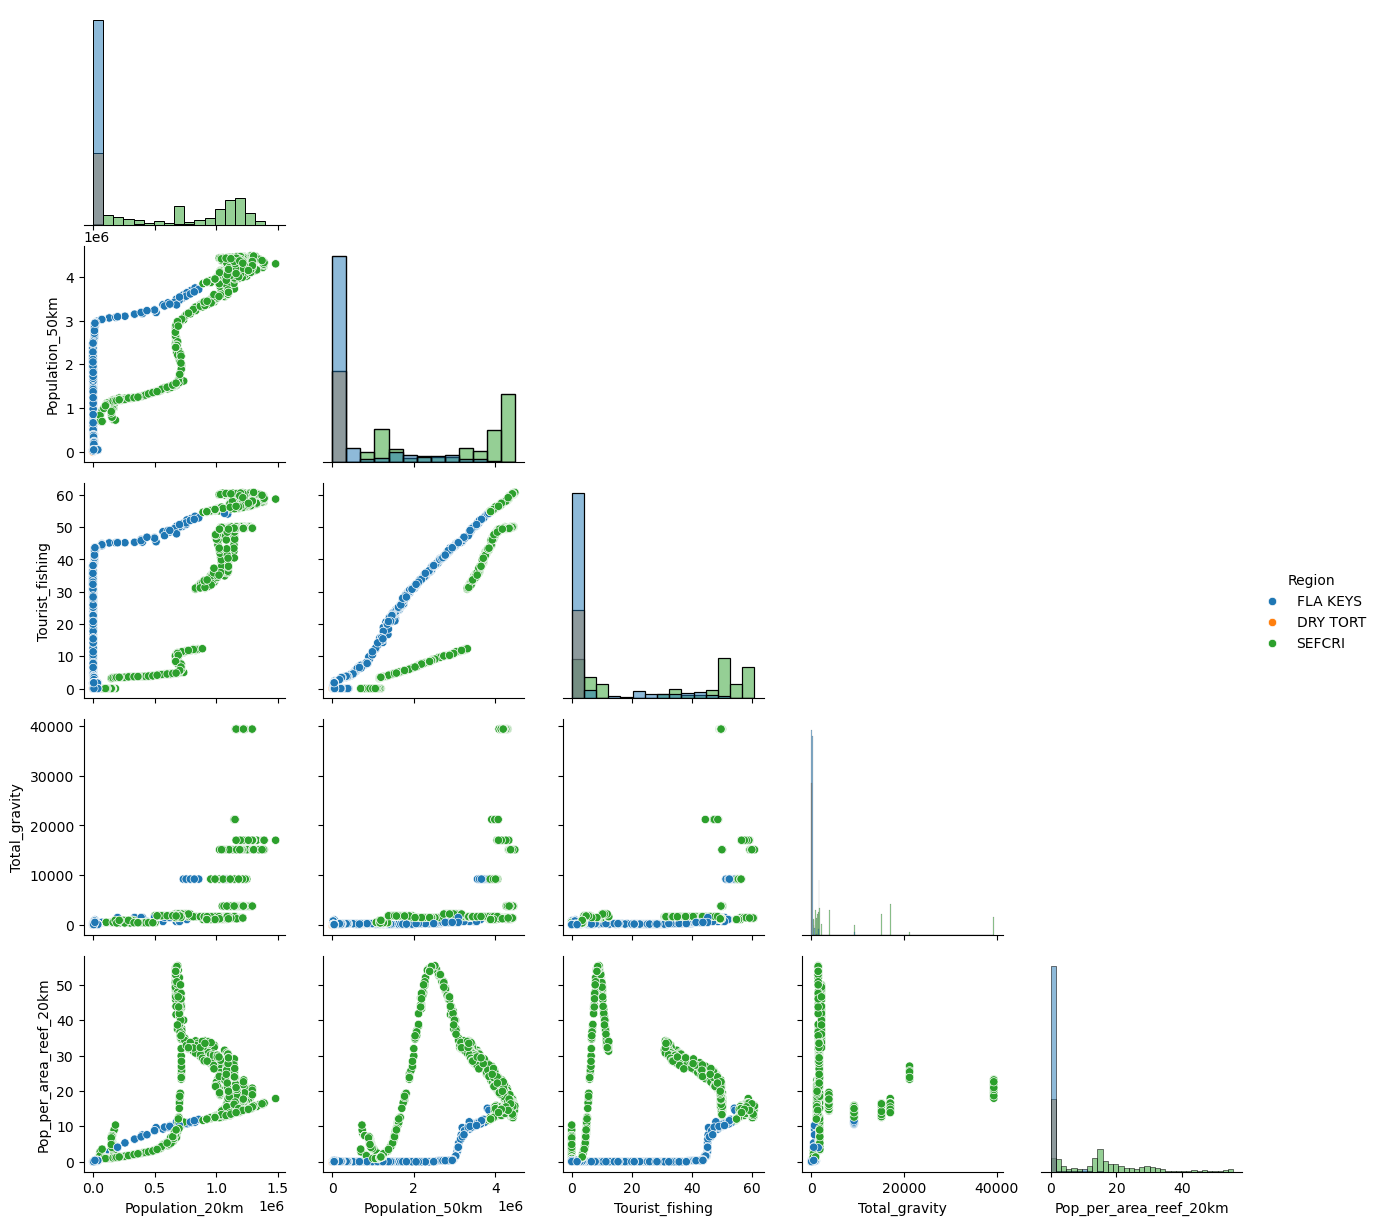

In [31]:
#evaluate the relation between the human features and the 3 regions: DRY TORT, FLA KEYS and SEFCRI
#here the relation of population

#the plot is half because the other side of the diagonal is a repeat of the lower part.
#the diag plot are in histogram to see the repartition of data in the feature

#diag_sharey=False, corner= True -> to draw only a part of the matrix
#.map_lower to having scatter plot only in the lower part of the matrix
#map_diag() to display the data in histogram in the diag only

g = sns.PairGrid(species, diag_sharey=False, corner= True, vars=['Population_20km','Population_50km', 'Tourist_fishing','Total_gravity','Pop_per_area_reef_20km'], hue="Region")
g.map_lower(sns.scatterplot) 
g.map_diag(sns.histplot)
g.add_legend()#to display the legend


Here we can see that the direct human presence (meaning the population close to the site, the fishing). The DRY TORT region seems to don't be in relation with this feature. Maybe, this site is isolate from close human presence.
It seems that, the region with the highest human presence is the SEFCRI with artistic relational. 
The FLA KEY seems to be more in relation/concern by the tourism fishing especially by people lives "far" from the site (50 km) compared to them closest (20km).

For the SEFCRI region the data about human activity seems to be sparse and no specific pattern in relation can be clearly distinct. 

It seems that, the region FLA KEY and SEFCRI are more impact by people who lives close to their site compared to people who live far. This observation is from the total_gravity which represent the people coming from a radial of 500 km in function of the travel time. In this feature the FLA KEY is close to 0 and for the SEFCRI the data are sparse whit many outliers. 

To resume:
- Maybe we can put aside the gravity feature
- the data about people live close to the site and fishing activity are sparse for the SEFCRI region
- the FLA KEY seems to be impact be people live close to it (20km) more by other features

*It can be needed to evaluate the relation between diversity index and this features by a correlation matrix*

In [32]:
#visual correlation matrix

px.imshow(species.loc[:,['Population_20km','Population_50km', 'Tourist_fishing','Total_gravity','Pop_per_area_reef_20km', 'Diversity_index']].corr())

The correlation matrix shows that:
- all these features shows a positive relation between them
- the positive relation between the people lives feature and the diversity_index is really low under 0.1..
*Maybe this feature will have a little influence on the diversity index -> quick research on literature for justification?*

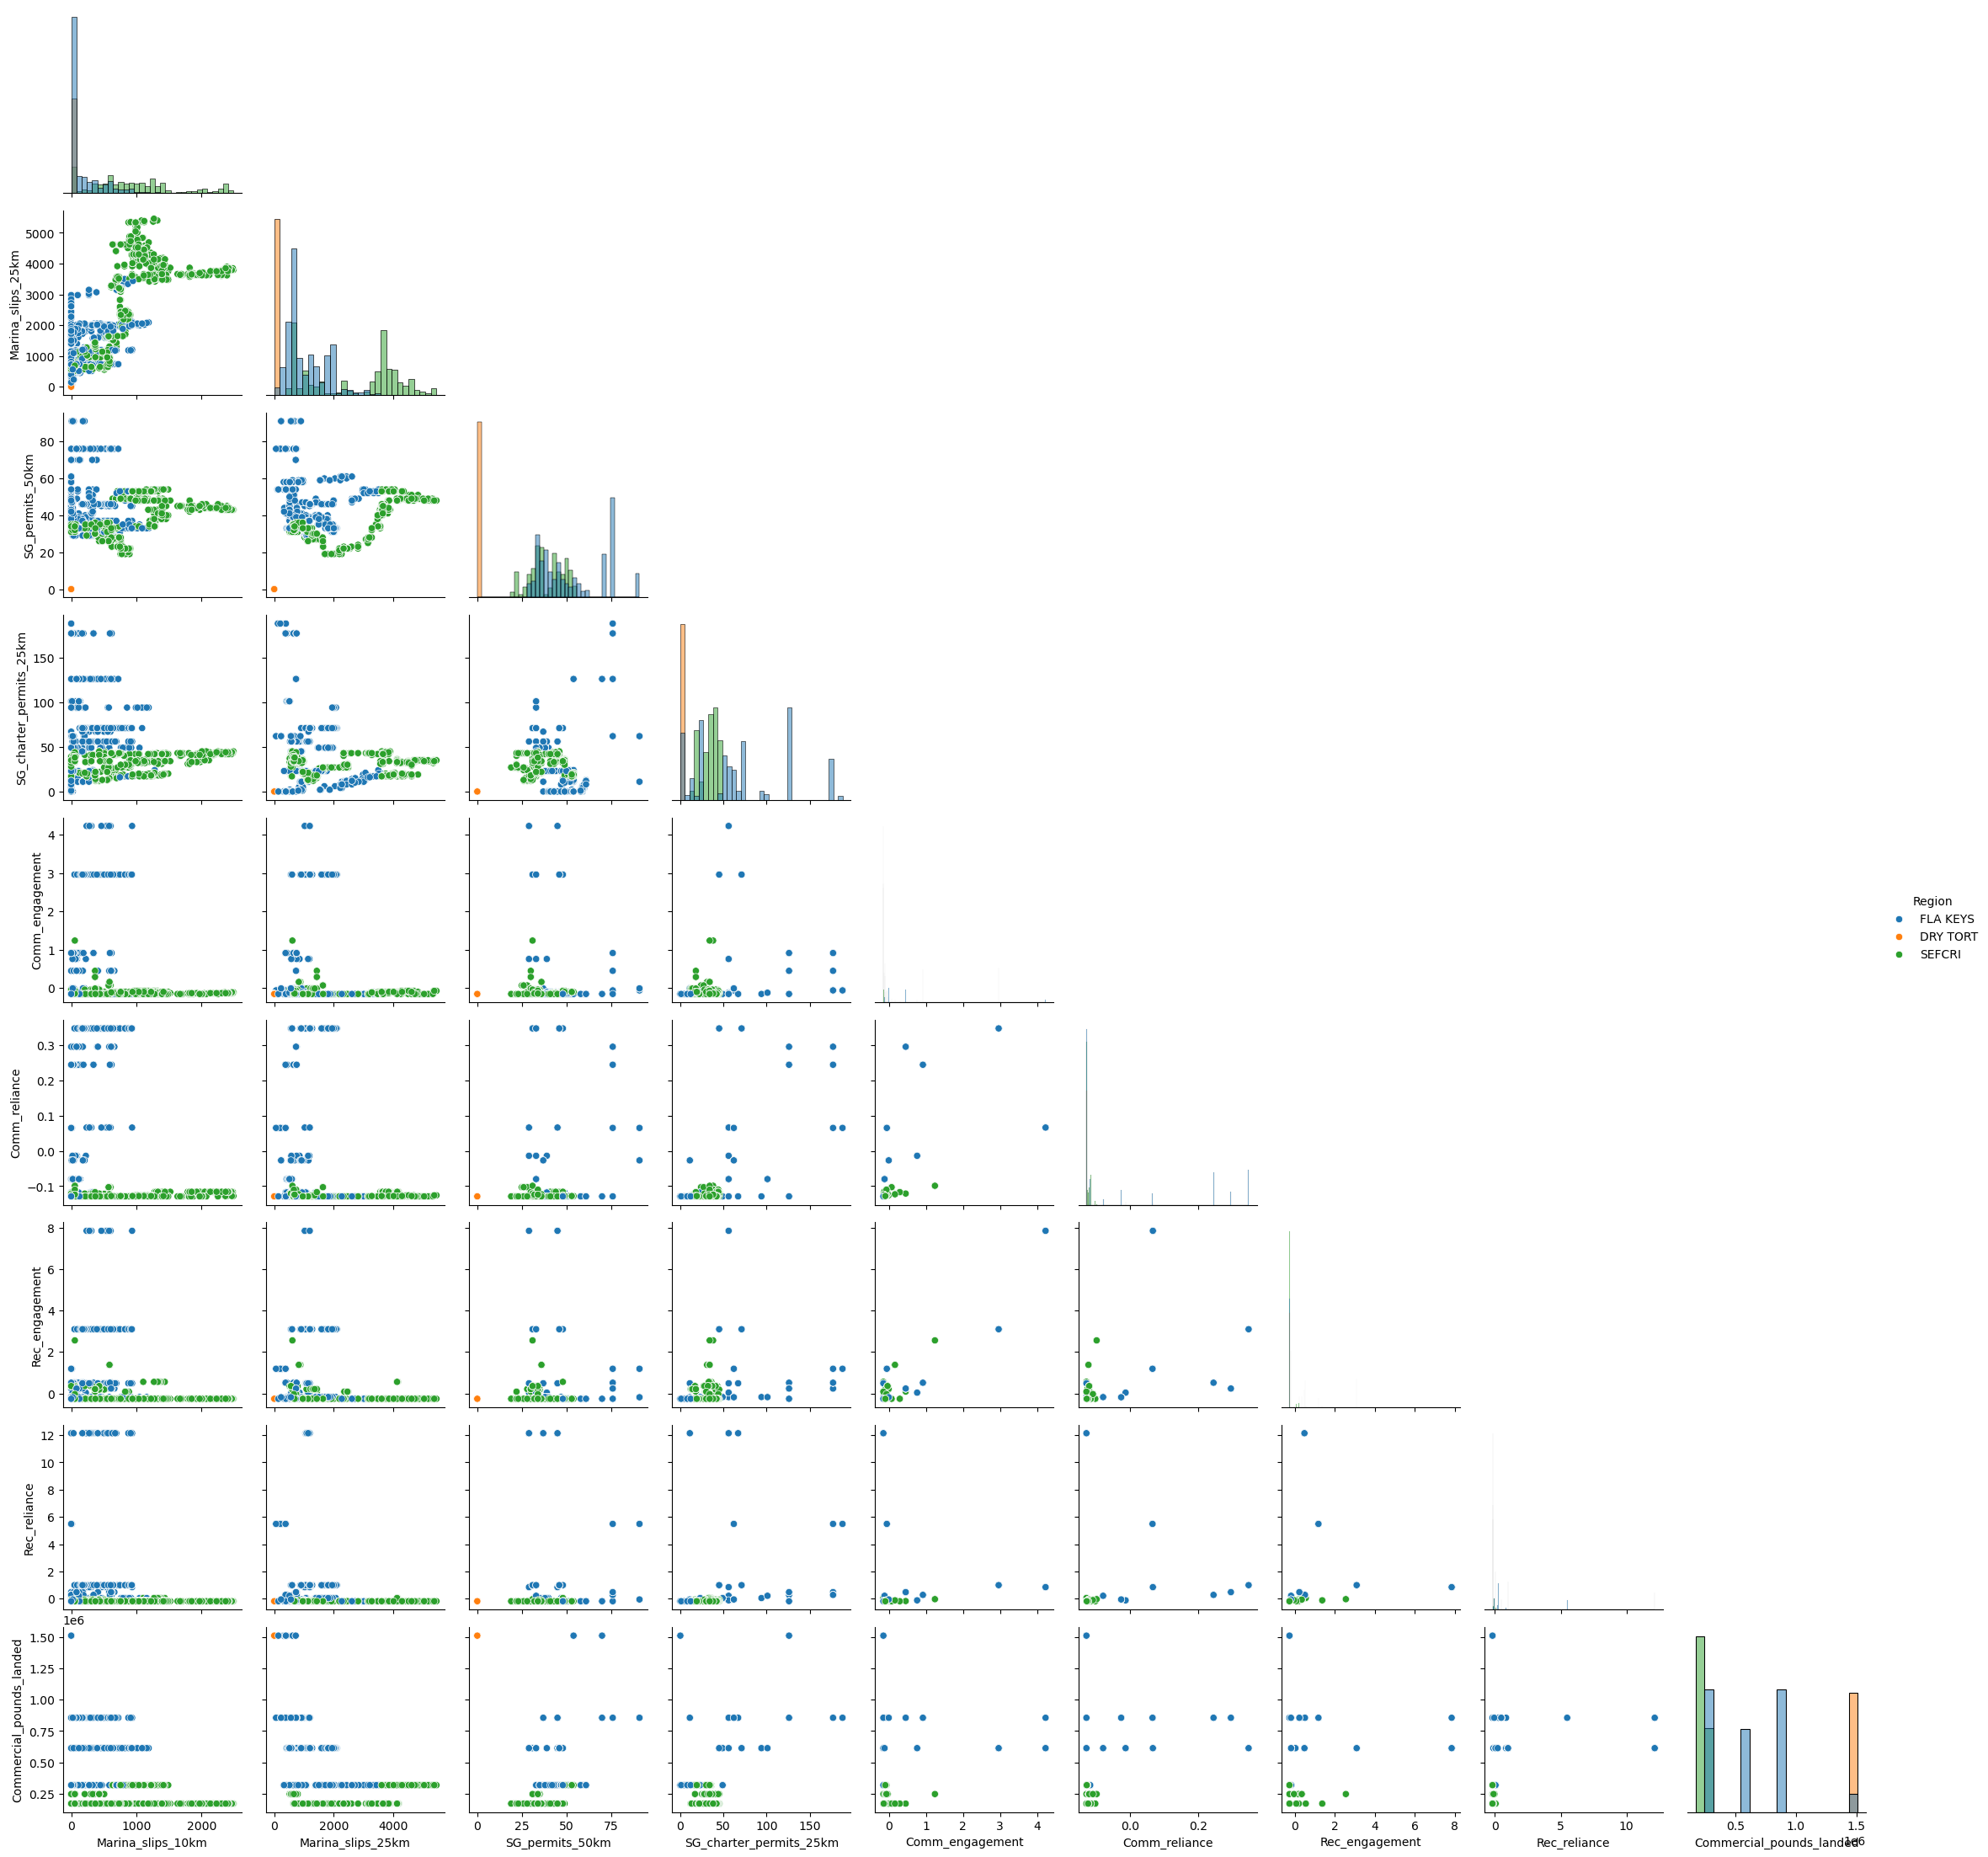

In [34]:
#relation between the region and the boat (leasure and commercial) activities

g = sns.PairGrid(species, diag_sharey=False, corner= True, vars=['Marina_slips_10km', 'Marina_slips_25km', 'SG_permits_50km', 'SG_charter_permits_25km','Comm_engagement', 'Comm_reliance', 'Rec_engagement', 'Rec_reliance','Commercial_pounds_landed'], hue="Region")
g.map_lower(sns.scatterplot)
g.map_diag(sns.histplot)
g.add_legend()

In general the data for this feature about the DRY TORT region are close to 0. 

This time it seems it's the FLA KEY region which is more impacted by the marine activity than the other region. In fact for most of the feature the SEFCRI shows values close to 0. Also, the data for FLA KEY are sparse for most of them. 

The features SG_charter_permits_20km, SG_permits_50km, marina_slips_10km and marina_slips_25km seems to be more concistent in term of observation compared to the other features when we cross them together
For these 3 features we can observed that:
- when we have a marina at 10 or 25km of the site the SG_permit_50km are higher in both region FLA KEY and SEFCRI compared to the SG_permit_25km where the number of SG_permit_25km is higher in SEFCRI compared to FLA KEY.*Maybe that can be in relation with the coral/reef repartion in the FLA KEY region which is higher compared to the SEFCRI*.
-for the marina slips at 10 and 25 km in the FLA KEY region it seems that we have a lot of permit for pleasure fishing compared to permit for charter at 25 km. suggesting the fishing activity will be more for pleasure than commercial in those region. 


*We can hypothezised that, the marine activity linked with commercial and pleasure fishing will influence the diversity index*.

In [36]:
#visual correlation matrix between the feature above and the diversity index.


px.imshow(species.loc[:,['Diversity_index','Marina_slips_10km', 'Marina_slips_25km', 'SG_permits_50km', 'SG_charter_permits_25km','Comm_engagement', 'Comm_reliance', 'Rec_engagement', 'Rec_reliance','Commercial_pounds_landed']].corr())

The correlation matrix above shows that:
- the diversity index seems to be influence more by marina_slips_25km and sg_permit_50km (positive correlation) compared to the other features.
- 


In [38]:
px.imshow(species.loc[:,['Diversity_index','Coral_cover','Reef_complexity','Marina_slips_10km', 'Marina_slips_25km', 'SG_permits_50km', 'SG_charter_permits_25km','Comm_engagement', 'Comm_reliance', 'Rec_engagement', 'Rec_reliance','Commercial_pounds_landed']].corr())

The coral cover and reef complexity shows a negative relation with the marina slips at 10 and 25km but a positive correlation with commercial_pounds_landed (which is the annual pound of fish takes by commercial fishing enterprise). For the others features the relation with coral and reef is weak. 

When we compared the relation between diversity index or the coral/reef feauture against the other we can observed that:
- when it has a strong positive relation (=< 0.1) with the diversity index the relation with coral/reef is strong but negative. Example with the marina 25 km where its positive with index (0.1) and negative with coral/reef (resp -0.2 and -0.1). 
- The relation between coral and reef feature with the diversity index is negative. 
- the commercial pounds seems to be highly positively corelate with the coral and reef (both around 0.2). But the correlation with diversity index is weak and negative (-0.07). Suggested that: the commercial fishing will don't be have a direct great impact on fish diversity but more on coral and reef which is in direct relation with diversity index. *This relation suggest is needed to keep the commercial pounds in the prediction of diversity index*.

*This suggest that, the marina_25km/10km is in direct relation with the coral/reef feature as well as the target*. *The relation between the marina and coral/reef is invert compared to the targets*. *Maybe they 4 influence the diversity index but in different manner (positively for the marina and negatively for the coral/reef)*. 

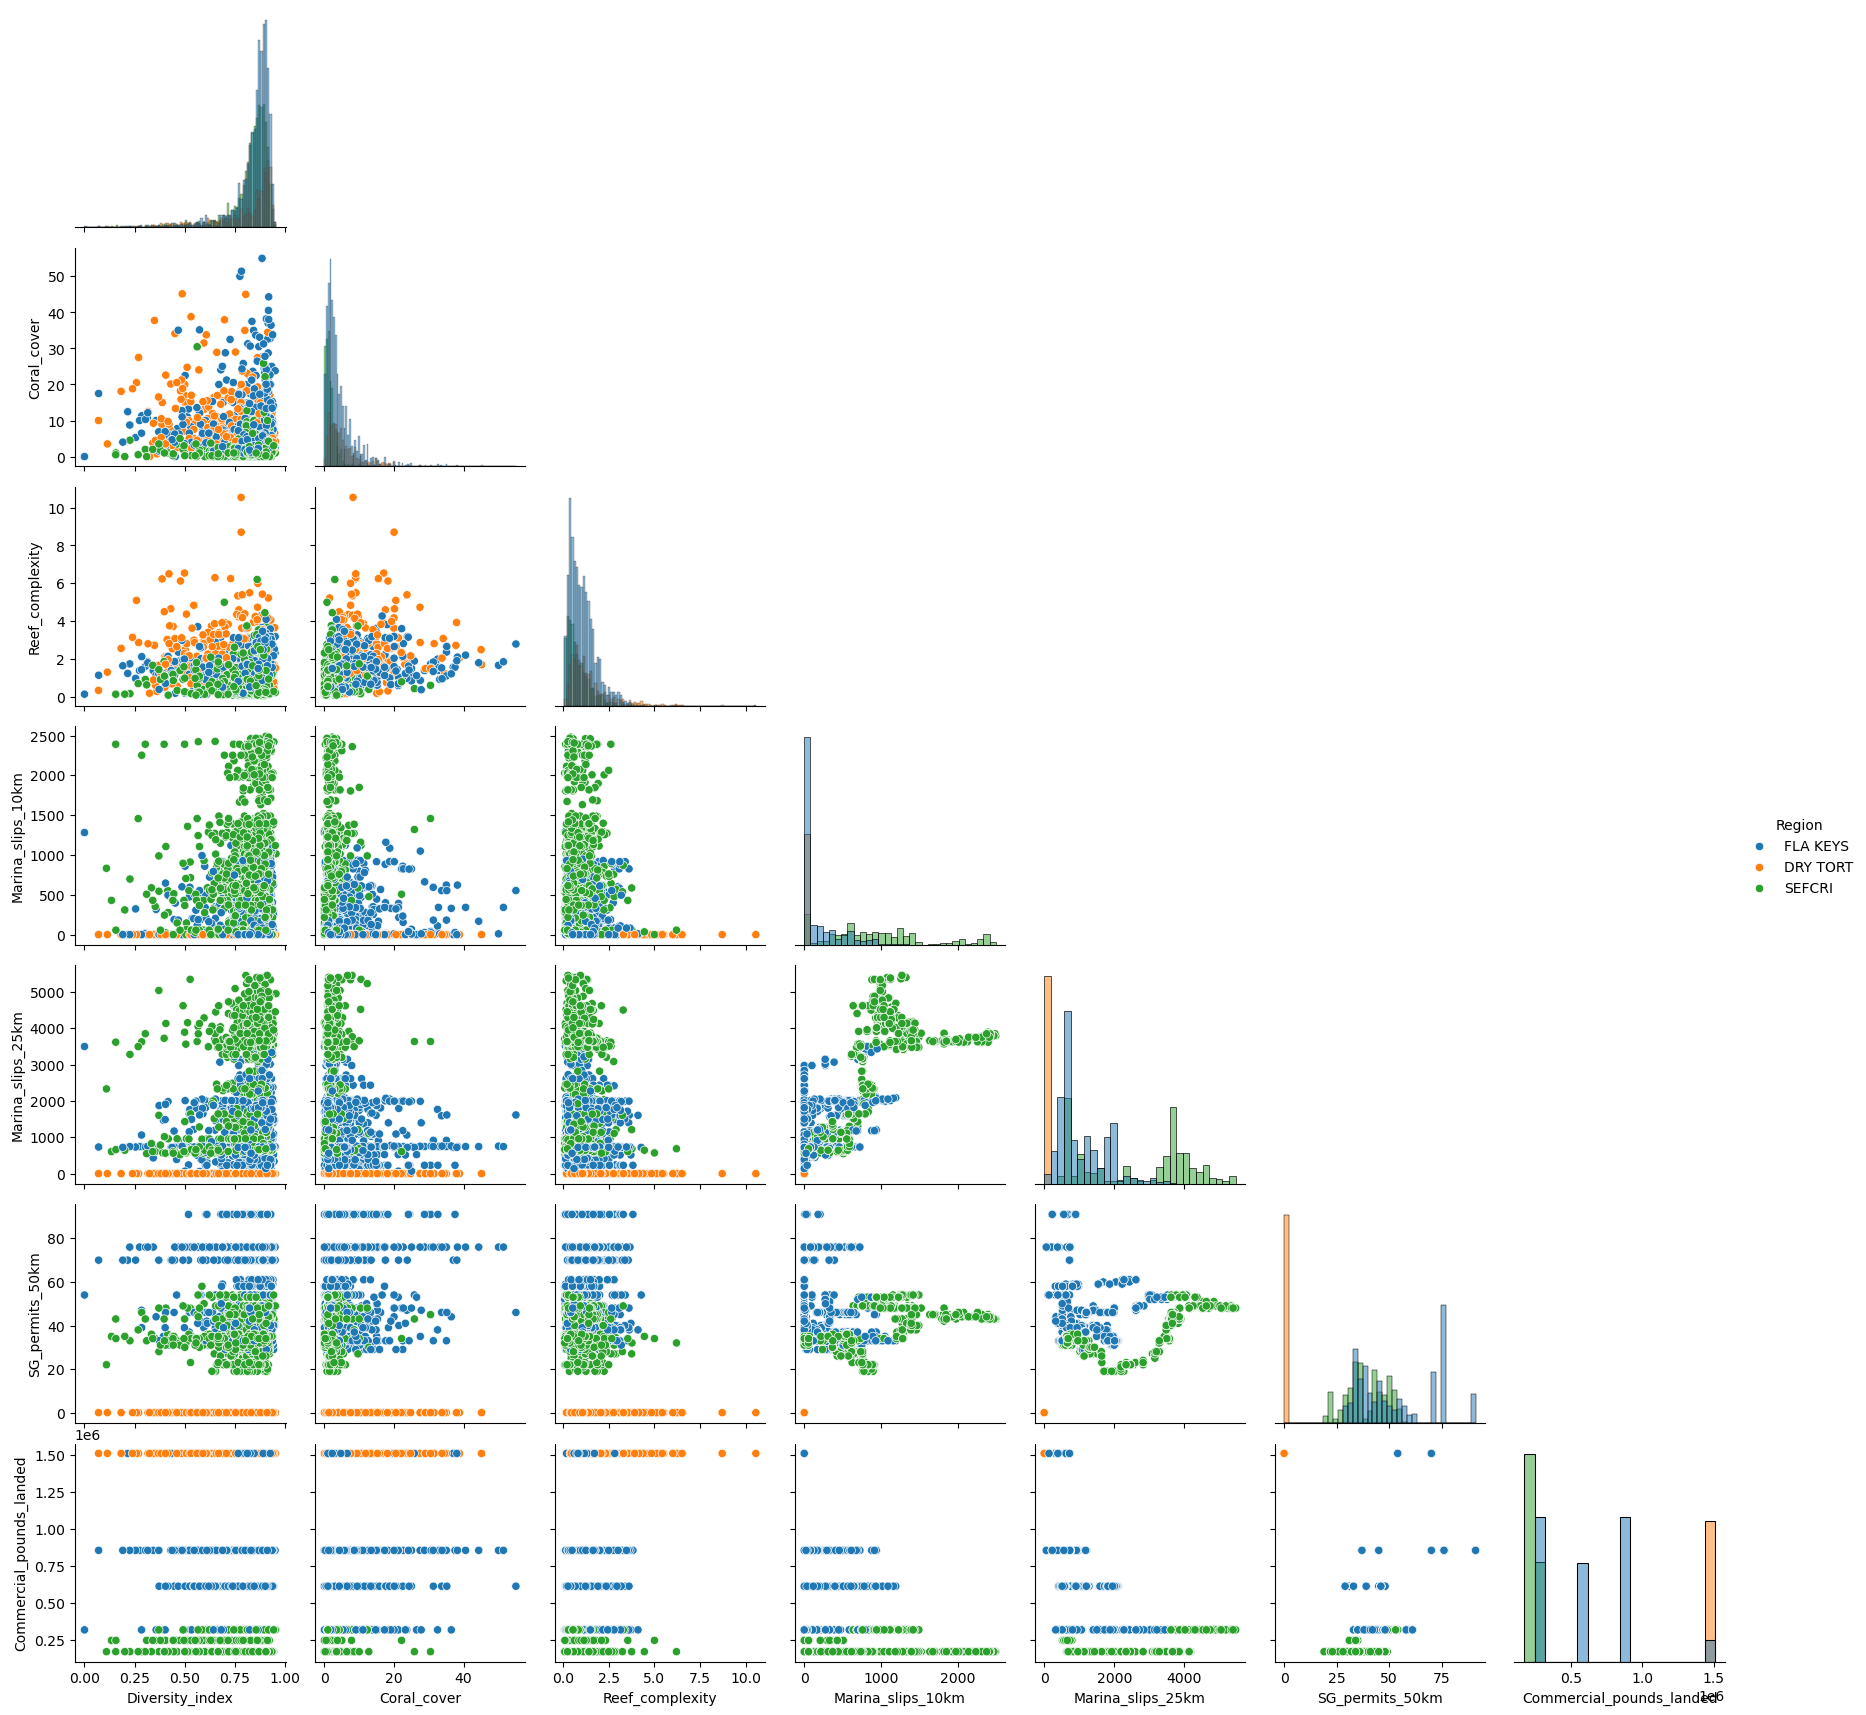

In [40]:
#relation between the region and the boat (leasure and commercial) activities

g = sns.PairGrid(species, diag_sharey=False, corner= True, vars=['Diversity_index','Coral_cover','Reef_complexity','Marina_slips_10km', 'Marina_slips_25km', 'SG_permits_50km','Commercial_pounds_landed'], hue="Region")
g.map_lower(sns.scatterplot)
g.map_diag(sns.histplot)
g.add_legend()

Those plot clear highlight the inverse correlation between the diversity index and coral/reef features. 
More over we can see that:
- for the diversity index, more it has marina slips at 10km or 25km higher is the diversity.
- for the sg_permit_50km higher is the diversity index the number of permit are between 20 to 60 for the core of the data especialy for the region SEFCRI and the region FLA KEYS shows an important quantity of data related to the permit over 60.

The repartition of the data for the sg_permit_50km in for the region FLA KEY seems to be highly heterogeneous. *Need to be take in account to tran the model*. 

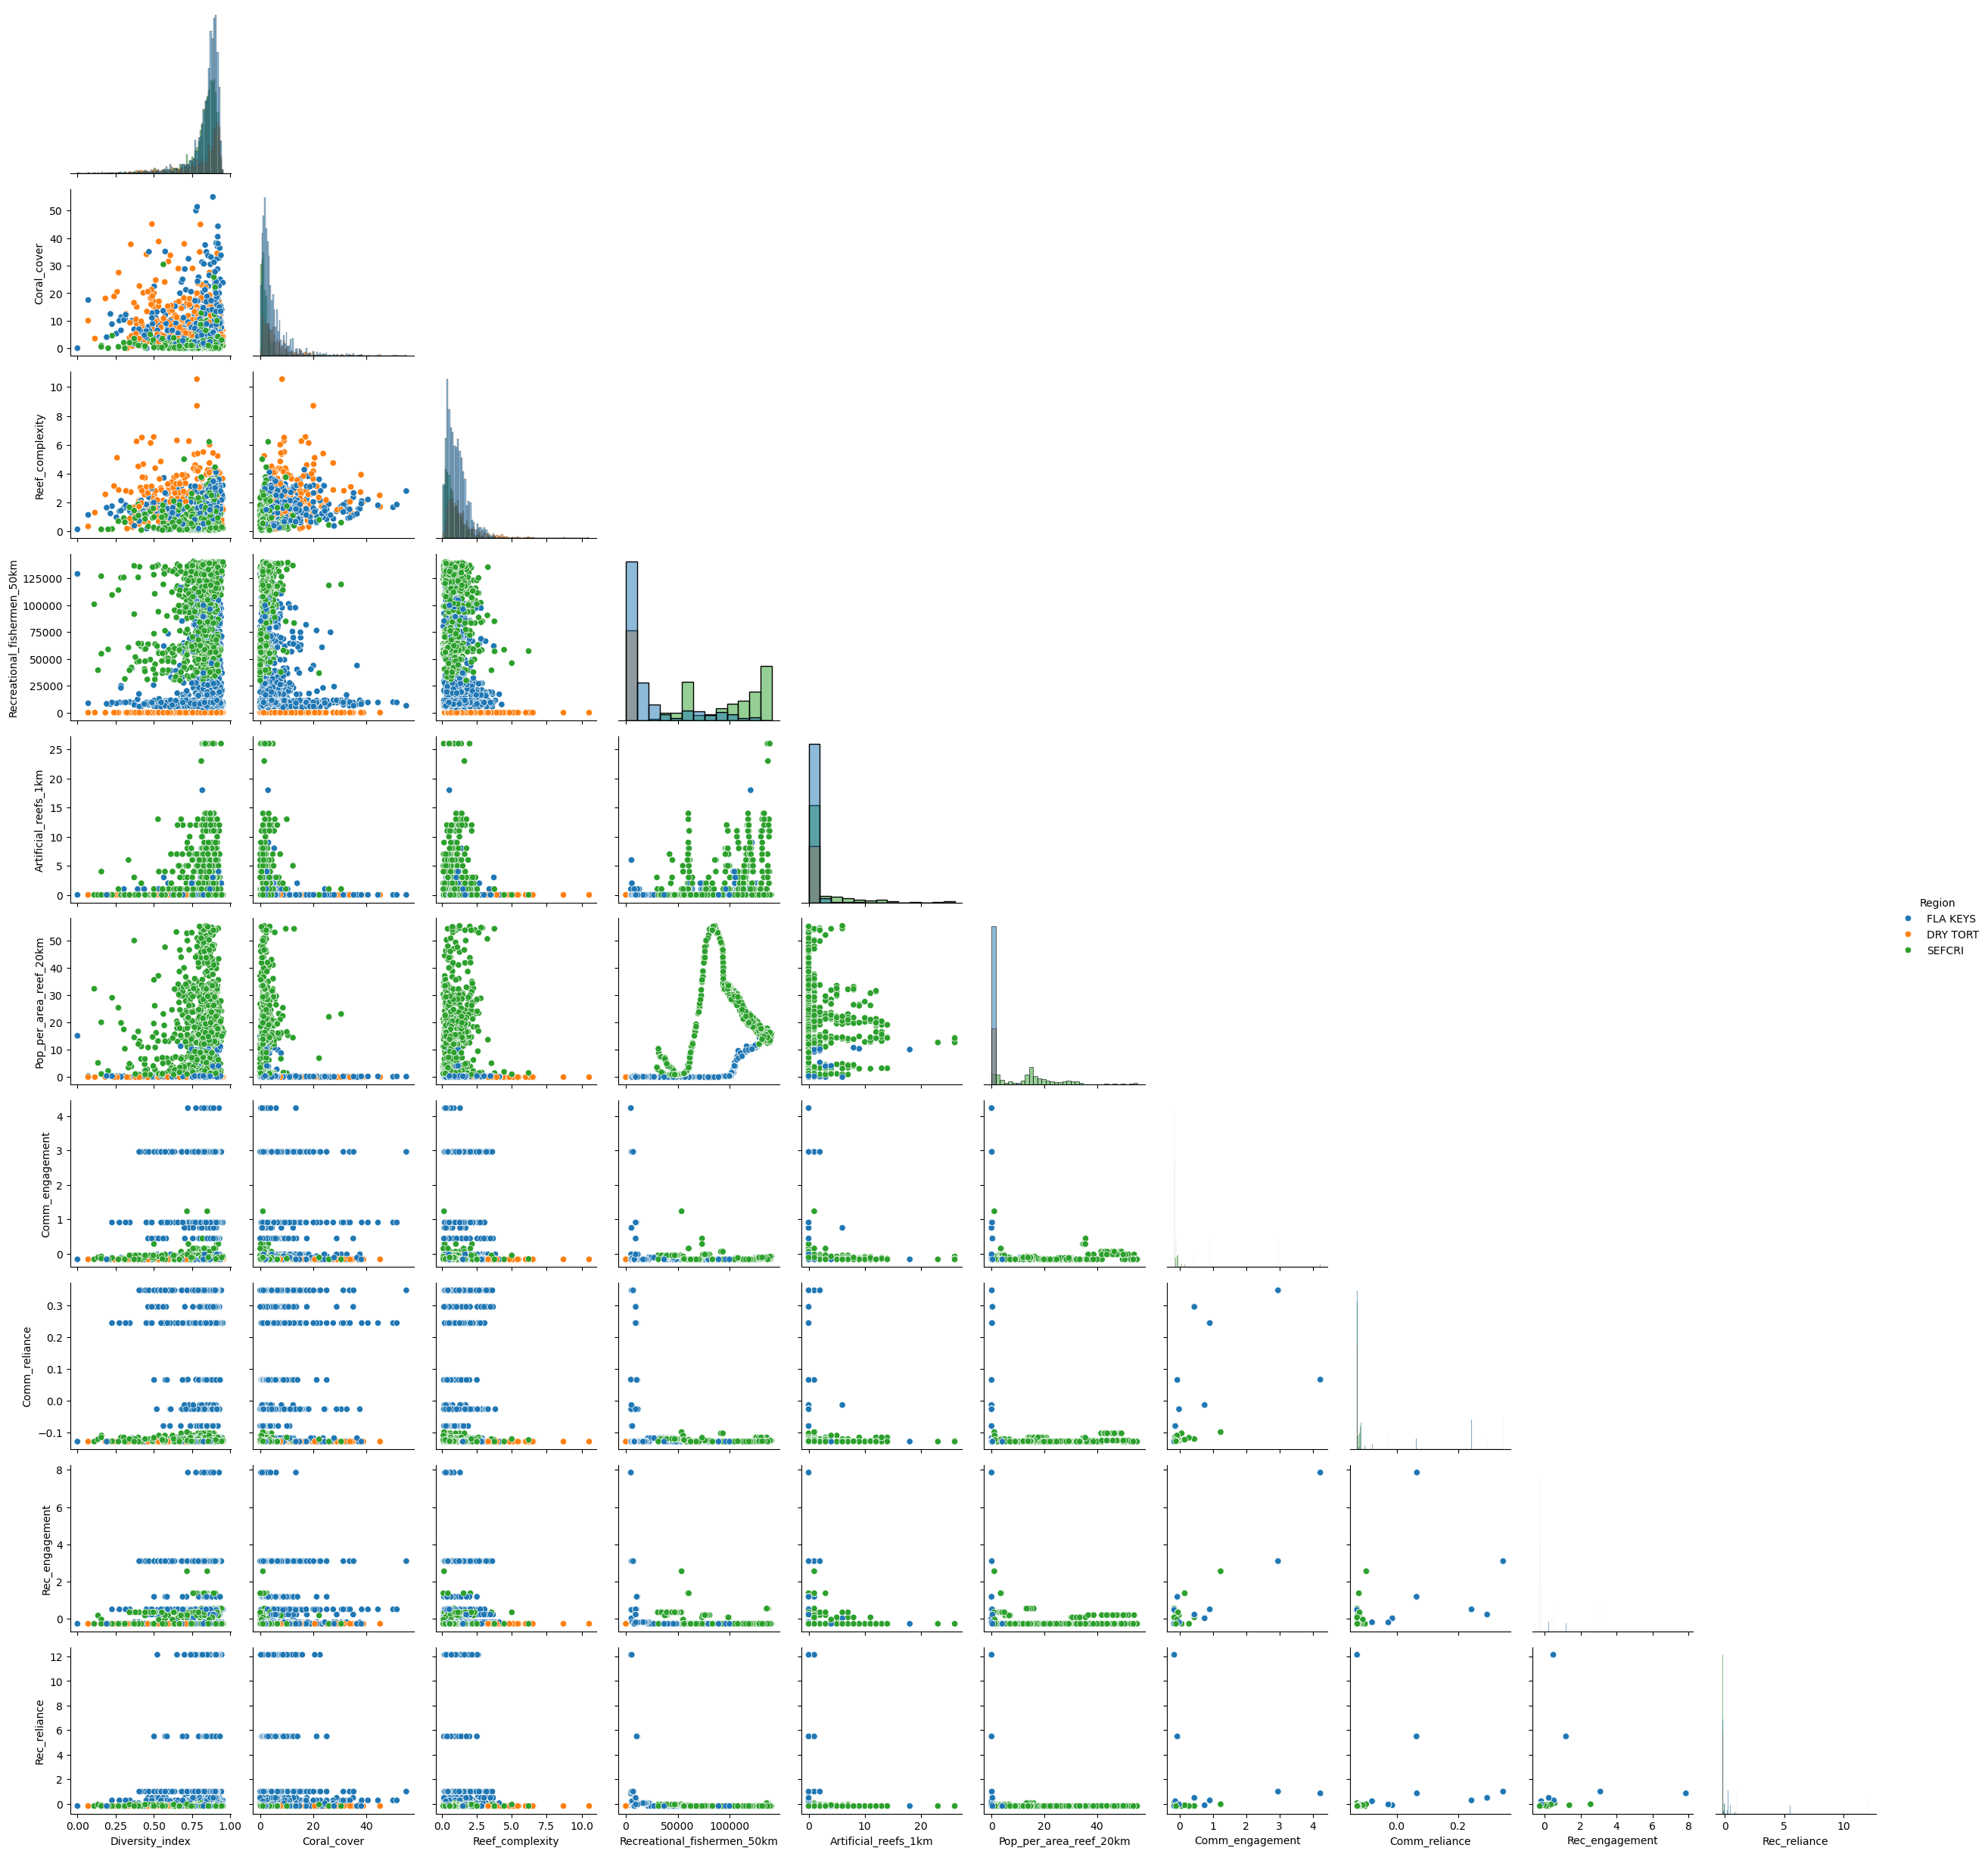

In [41]:
#evaluation of the relation between the diversity index, the coral/reef and the leasure and commercial fishing activities in function of the region

g = sns.PairGrid(species, diag_sharey=False, corner= True, vars=['Diversity_index','Coral_cover','Reef_complexity','Recreational_fishermen_50km', 'Artificial_reefs_1km', 'Pop_per_area_reef_20km','Comm_engagement', 'Comm_reliance', 'Rec_engagement', 'Rec_reliance'], hue="Region")
g.map_lower(sns.scatterplot)
g.map_diag(sns.histplot)
g.add_legend()




This plot shows that:
- it seems we have consistent data only for the 5 first cols of this matrix (begin at the left).
- it seems that, we have more recreational fisherman in artificial reef compared in complex natural reef or site whit high coral cover. 
- higher is the diversity index more the value for pop_per_aera, artificial_reef, and recreational_fishermen are high. Suggest this features will influence the diversity index. 

In [42]:
px.imshow(species.loc[:, ['Diversity_index','Coral_cover','Reef_complexity','Recreational_fishermen_50km', 'Artificial_reefs_1km', 'Pop_per_area_reef_20km','Comm_engagement', 'Comm_reliance', 'Rec_engagement', 'Rec_reliance']].corr())

This correlation matrix, on the contrary of the above plotting suggest a weak correlation between this features and the diversity index. In fact, all shows a correlation score above 0.1. 
Perhaps, Comm_reliance, pop_per_aera, and Recreational shows a good correlation with coral or reef feature (around 0.1 and 0.2). Maybe that can create an indirect link between this feature and the diversity index. *it is needed to consider to keep this feature in the model for predicting the diversity index*. 
Also, the pop_per aera show a strong relation with the recreational fisherman and the negative relation between coral cover and pop_per aera is good (-0.1). This suggest we need to at list keep the pop_per_aera and recreational_fishermen in the model to predict the diversity index. 

Analyse the feature of water wave exposure, depth, place of the fish in the water col etc.. for their influence by region and the diversity index. 